# （ナイーブな）トロッター展開によるイジングダイナミクス

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time 
import random
from qulacs import QuantumState
from qulacs import QuantumCircuit
from qulacs.gate import DenseMatrix
from qulacs.circuit import QuantumCircuitOptimizer
from qulacs import QuantumState
from qulacs.gate import Identity, X,Y,Z #パウリ演算子
from qulacs.gate import H,S,Sdag, sqrtX,sqrtXdag,sqrtY,sqrtYdag #1量子ビット Clifford演算
from qulacs.gate import T,Tdag #1量子ビット 非Clifford演算
from qulacs.gate import RX,RY,RZ #パウリ演算子についての回転演算
from qulacs.gate import CNOT, CZ, SWAP #2量子ビット演算
from qulacs import Observable
import math
from qulacs.gate import DephasingNoise,DepolarizingNoise

ランダムな全結合横磁場イジング模型

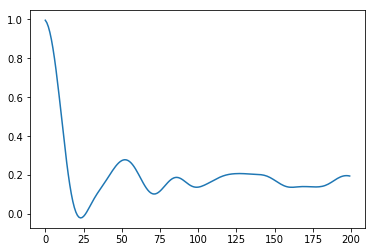

In [25]:
#スピン1/2の数
num_spin=10

#シミュレーション時間
T=10

#分割数
r=200.0

#ランダム磁場
hx=[random.random() for i in range(num_spin)]

#ランダムイジング結合定数
J = [random.random() for i in range(num_spin)]
        
#オブザーバブルを定義
X_magnetization = Observable(num_spin)

for i in range(num_spin):
    X_magnetization.add_operator(1.0/num_spin,"X {0}".format(i)) 
#X_magnetization.add_operator(1.0,"X 2") 
    
#各ステップごとにオブザーバーブルを出力してみる

IsingDynamics = QuantumCircuit(num_spin)

for i in range(num_spin):
    for j in range(i):
        IsingDynamics.add_gate(CNOT(j,i))
        IsingDynamics.add_gate(RZ(i,J[i]*T/r))
        IsingDynamics.add_gate(CNOT(j,i))

for i in range(num_spin):
    IsingDynamics.add_gate(RX(i,hx[i]*T/r))

tmp = [0.0 for j in range(int(r))]

#横磁場状態の準備
state = QuantumState(num_spin)
state.set_zero_state()

transversal_H = QuantumCircuit(num_spin)
for i in range(num_spin):
    transversal_H.add_H_gate(i)

transversal_H.update_quantum_state(state)

#時間発展の計算と期待値の取得
for k in range(int(r)):
    IsingDynamics.update_quantum_state(state)
    tmp[k] =  X_magnetization.get_expectation_value(state)


plt.plot(tmp)
plt.show()

時間発展を出力する関数を定義しておく。

In [14]:
def TrotterizedIsing(num_spin,T,r,J,h,obs):
    IsingDynamics = QuantumCircuit(num_spin)

    for i in range(num_spin):
        for j in range(i):
            IsingDynamics.add_gate(CNOT(j,i))
            IsingDynamics.add_gate(RZ(i,J[i]*T/r))
            IsingDynamics.add_gate(CNOT(j,i))

    for i in range(num_spin):
        IsingDynamics.add_gate(RX(i,h[i]*T/r))

    tmp = [0.0 for j in range(int(r))]

    #横磁場状態の準備
    state = QuantumState(num_spin)
    state.set_zero_state()

    transversal_H = QuantumCircuit(num_spin)
    for i in range(num_spin):
        transversal_H.add_H_gate(i)

    transversal_H.update_quantum_state(state)

    #時間発展の計算と期待値の取得
    for k in range(int(r)):
        IsingDynamics.update_quantum_state(state)
        tmp[k] =  obs.get_expectation_value(state)

    return tmp


分割数による誤差を可視化する

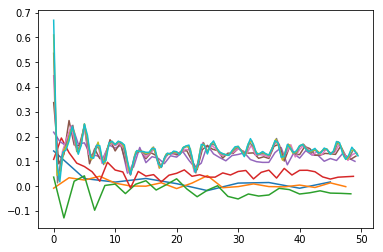

In [24]:
num_spin = 12
sim_time = 50

#ランダム磁場
hx=[random.random() for i in range(num_spin)]

#ランダムイジング結合定数
J = [random.random() for i in range(num_spin)]
        
#オブザーバブルを定義
X_magnetization = Observable(num_spin)
for i in range(num_spin):
    X_magnetization.add_operator(1.0/num_spin,"X {0}".format(i)) 


for i in range(10):
    num_trotter = 10*(i+1)
    plt.plot([sim_time/num_trotter*k for k in range(num_trotter)],TrotterizedIsing(num_spin,sim_time,num_trotter,J,hz,X_magnetization))
plt.show()